In [ ]:
import cv2
import imutils
import matplotlib.pyplot as plt
import collections

In [1]:
class Shape:
    def __init__(self):
        pass

    def detect(self, c):
        shape = 'unidentified'
        perimeter = cv2.arcLength(c, True)
        approximation = cv2.approxPolyDP(c, 0.04 * perimeter, True)
        num_vertices = len(approximation)
        
        if num_vertices == 3:
            shape = "triangle"
        elif num_vertices == 4:
            (x, y, w, h) = cv2.boundingRect(approximation)
            ratio = w / float(h)
            shape = "square" if ratio >= 0.95 and ratio <= 1.05 else "rectangle"
        elif num_vertices == 5:
            shape = "pentagon"
        elif num_vertices >= 10:
            if self.is_star(c, num_vertices):
                shape = "star"
            else:
                shape = "circle"
        else:
            shape = "circle"
        return shape

    def is_star(self, contour, num_vertices):
        if num_vertices % 2 == 0:
            angles = self.calculate_angles(contour)
            if len(angles) > 0 and any(a > 150 for a in angles):
                return True
        return False

    def calculate_angles(self, contour):
        angles = []
        for i in range(len(contour)):
            pt1 = contour[i - 1][0]
            pt2 = contour[i][0]
            pt3 = contour[(i + 1) % len(contour)][0]
            angle = self.angle_between_three_points(pt1, pt2, pt3)
            angles.append(angle)
        return angles

    def angle_between_three_points(self, pt1, pt2, pt3):
        v1 = pt1 - pt2
        v2 = pt3 - pt2
        angle = np.arctan2(np.linalg.det([v1, v2]), np.dot(v1, v2))
        return np.degrees(angle)


In [7]:
import numpy as np
def read_csv_(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    
    # Convert the path_XYs into contours
    contours = []
    for path in path_XYs:
        for XY in path:
            if len(XY) > 0:
                contour = np.array(XY, dtype=np.int32).reshape((-1, 1, 2))
                contours.append(contour)
    return contours


In [3]:
def plot(paths_XYs, title, ax):
    colours = ['red', 'green', 'blue', 'yellow', 'purple']  # Define some colors for plotting
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(title)


In [21]:
csv_path = "../problems/test_cases/isolated.csv"

# Read contours from CSV


In [9]:
contours = read_csv_(csv_path)
sd = Shape()

In [13]:
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [14]:
import cv2
import numpy as np
image = np.zeros((600, 600, 3), dtype=np.uint8)

for c in contours:
    # Detect the shape of the contour
    shape = sd.detect(c)
    
    # Draw the contours and the name of the shape on the image
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)


In [17]:
!pip install matplotlib

  Using cached matplotlib-3.9.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.1.post1-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.1-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


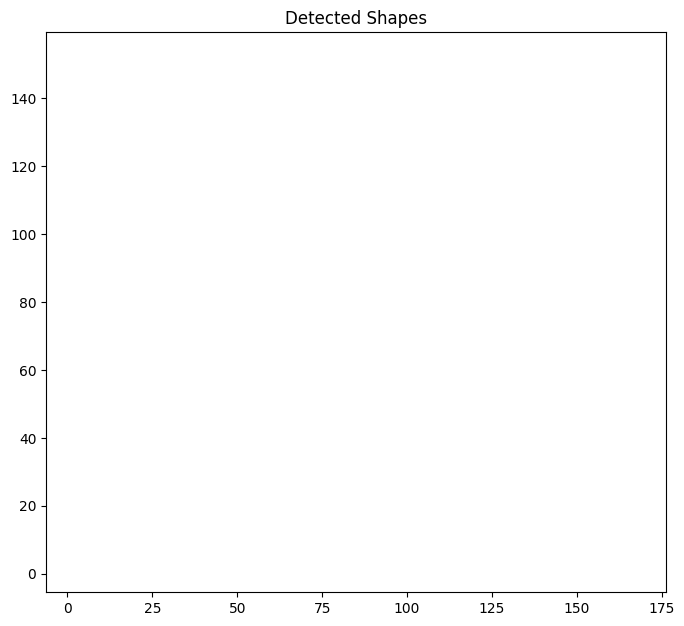

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
plot([np.concatenate(contours)], 'Detected Shapes', ax)
# plt.show()

# Show the output image
cv2.imshow("Detected Shapes", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
